In [11]:
import h3
import geopandas as gpd
import os
import shapely

In [2]:
h3.__version__

'4.0.0b5'

In [5]:
fp = os.path.join('..', 'Data', 'collab_map', 'Download_2617520')

In [6]:
ntm = gpd.read_file(os.path.join(fp, 'ntm_5720827', 'ntm_5720827.gpkg'), layer = 'Points')

In [41]:
ntm['h3_res10'] = ntm.to_crs('EPSG:4326')['geometry'].apply(lambda geom: h3.latlng_to_cell(geom.y, geom.x, 10))
ntm['h3_res11'] = ntm.to_crs('EPSG:4326')['geometry'].apply(lambda geom: h3.latlng_to_cell(geom.y, geom.x, 11))

In [42]:
h3_res10 = gpd.read_file(os.path.join('..', 'Data', 'collab_map', 'h3res10.gpkg'))

In [22]:
h3_res11 = gpd.read_file(os.path.join('..', 'Data', 'collab_map', 'h3res11.gpkg'))

In [28]:
ntm.head(5)

,ntm_id,max,mean,area,std,perimeter,date_1,date_2,date_3,date_4,os1k,os10k,os100k,copyright,geometry,h3_res11
0,NTM_TQ2778_528000000_178364500,9.57,8.55,9.56,1.01,17.0,2022-04-30,,,,TQ2778,TQ27,TQ,(c) Bluesky International Ltd. 2021,POINT (528000.000 178364.500),8b194ad1608cfff
1,NTM_TQ2779_528002250_179046750,19.94,15.08,196.63,3.69,92.0,2022-04-30,,,,TQ2779,TQ27,TQ,(c) Bluesky International Ltd. 2021,POINT (528002.250 179046.750),8b194ad16c53fff
2,NTM_TQ2779_528000000_179081750,11.44,10.69,5.44,0.53,11.0,2022-04-30,,,,TQ2779,TQ27,TQ,(c) Bluesky International Ltd. 2021,POINT (528000.000 179081.750),8b194ad16c50fff
3,NTM_TQ2779_528000125_179925875,8.03,6.16,19.75,1.49,32.0,2022-04-30,,,,TQ2779,TQ27,TQ,(c) Bluesky International Ltd. 2021,POINT (528000.125 179925.875),8b195da49693fff
4,NTM_TQ2878_528668250_178797625,23.47,20.61,52.81,2.06,42.0,2022-04-30,,,,TQ2878,TQ27,TQ,(c) Bluesky International Ltd. 2021,POINT (528668.250 178797.625),8b194ad168c0fff


In [39]:
h3_res11_merged = h3_res11.merge(
    ntm.groupby('h3_res11')['area'].sum(),
    how = 'left',
    left_on = 'index',
    right_index = True
).fillna(0)

<Axes: >

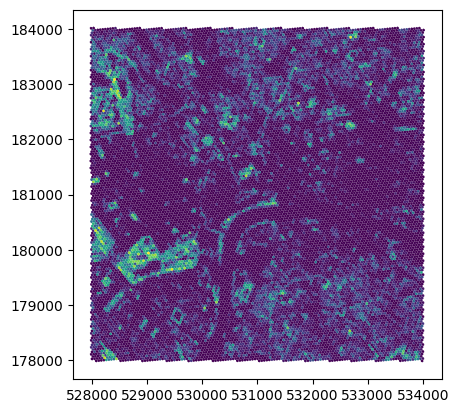

In [40]:
h3_res11_merged.plot(column = 'area')

In [45]:
h3_res11_merged.to_file(os.path.join('..', 'Data', 'collab_map', 'h3res11_trees.gpkg'), driver = 'GPKG')

In [43]:
h3_res10_merged = h3_res10.merge(
    ntm.groupby('h3_res10')['area'].sum(),
    how = 'left',
    left_on = 'index',
    right_index = True
).fillna(0)

<Axes: >

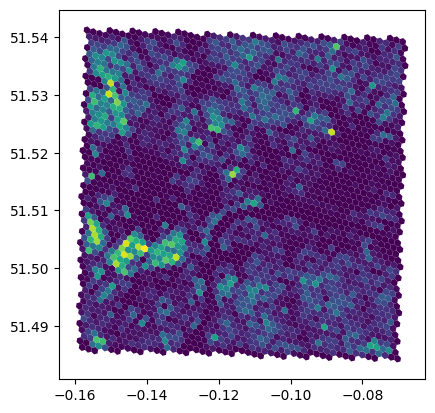

In [44]:
h3_res10_merged.plot(column = 'area')